# Rotación Solar
Juan David Galan Vargas - 202111470

# Prueba 1: Velocidad Radial del Sol

## Importar Datos

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Proyecto Experimental\Datos_pixeles.csv")
# Extract column names and data
x_column, y_column = df.columns
x_values = df[x_column]
y_values = df[y_column]


In [93]:
#def generate_parabola(x,h,k, a):
#    return a * (x - h)**2 + k

In [94]:
def generate_parabola1(x, x0, y0,a, sigma):
    return y0 + a * -np.exp(-(x - x0)**2 / (2 * sigma**2))

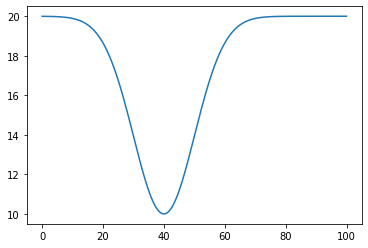

In [95]:
hori=np.linspace(0,100,1000)
verti=generate_parabola1(hori,40,20,10,10)
plt.plot(hori,verti)

In [96]:
#from scipy.special import wofz
#def generate_parabola(x, center,base, amplitude, sigma, gamma):
    #Parameters:
    #- x: Independent variable.
    #- amplitude: Peak intensity.
    #- center: Center of the peak.
    #- sigma: Width of the Gaussian component.
    #- gamma: Width of the Lorentzian component.
    #z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    #return amplitude * np.real(wofz(z)).astype(float)+base

# Ajuste de Curva: Perfil de Voigt (Astropy)

In [97]:
from astropy.modeling.models import Voigt1D
def generate_parabola(x,center,base,amplitude,L,G):
    v1 = Voigt1D(x_0=center, amplitude_L=amplitude, fwhm_L=L, fwhm_G=G)
    return (-1*v1(x))+base

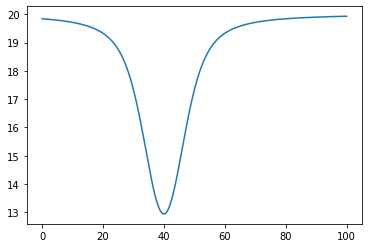

In [98]:
hori=np.linspace(0,100,1000)
verti=generate_parabola(hori,40,20,10,10,10)
plt.plot(hori,verti)

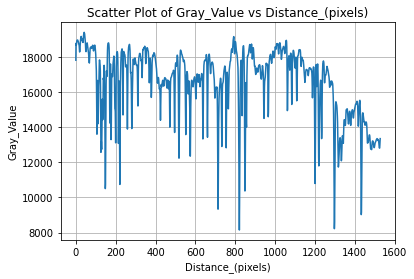

In [99]:
plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()


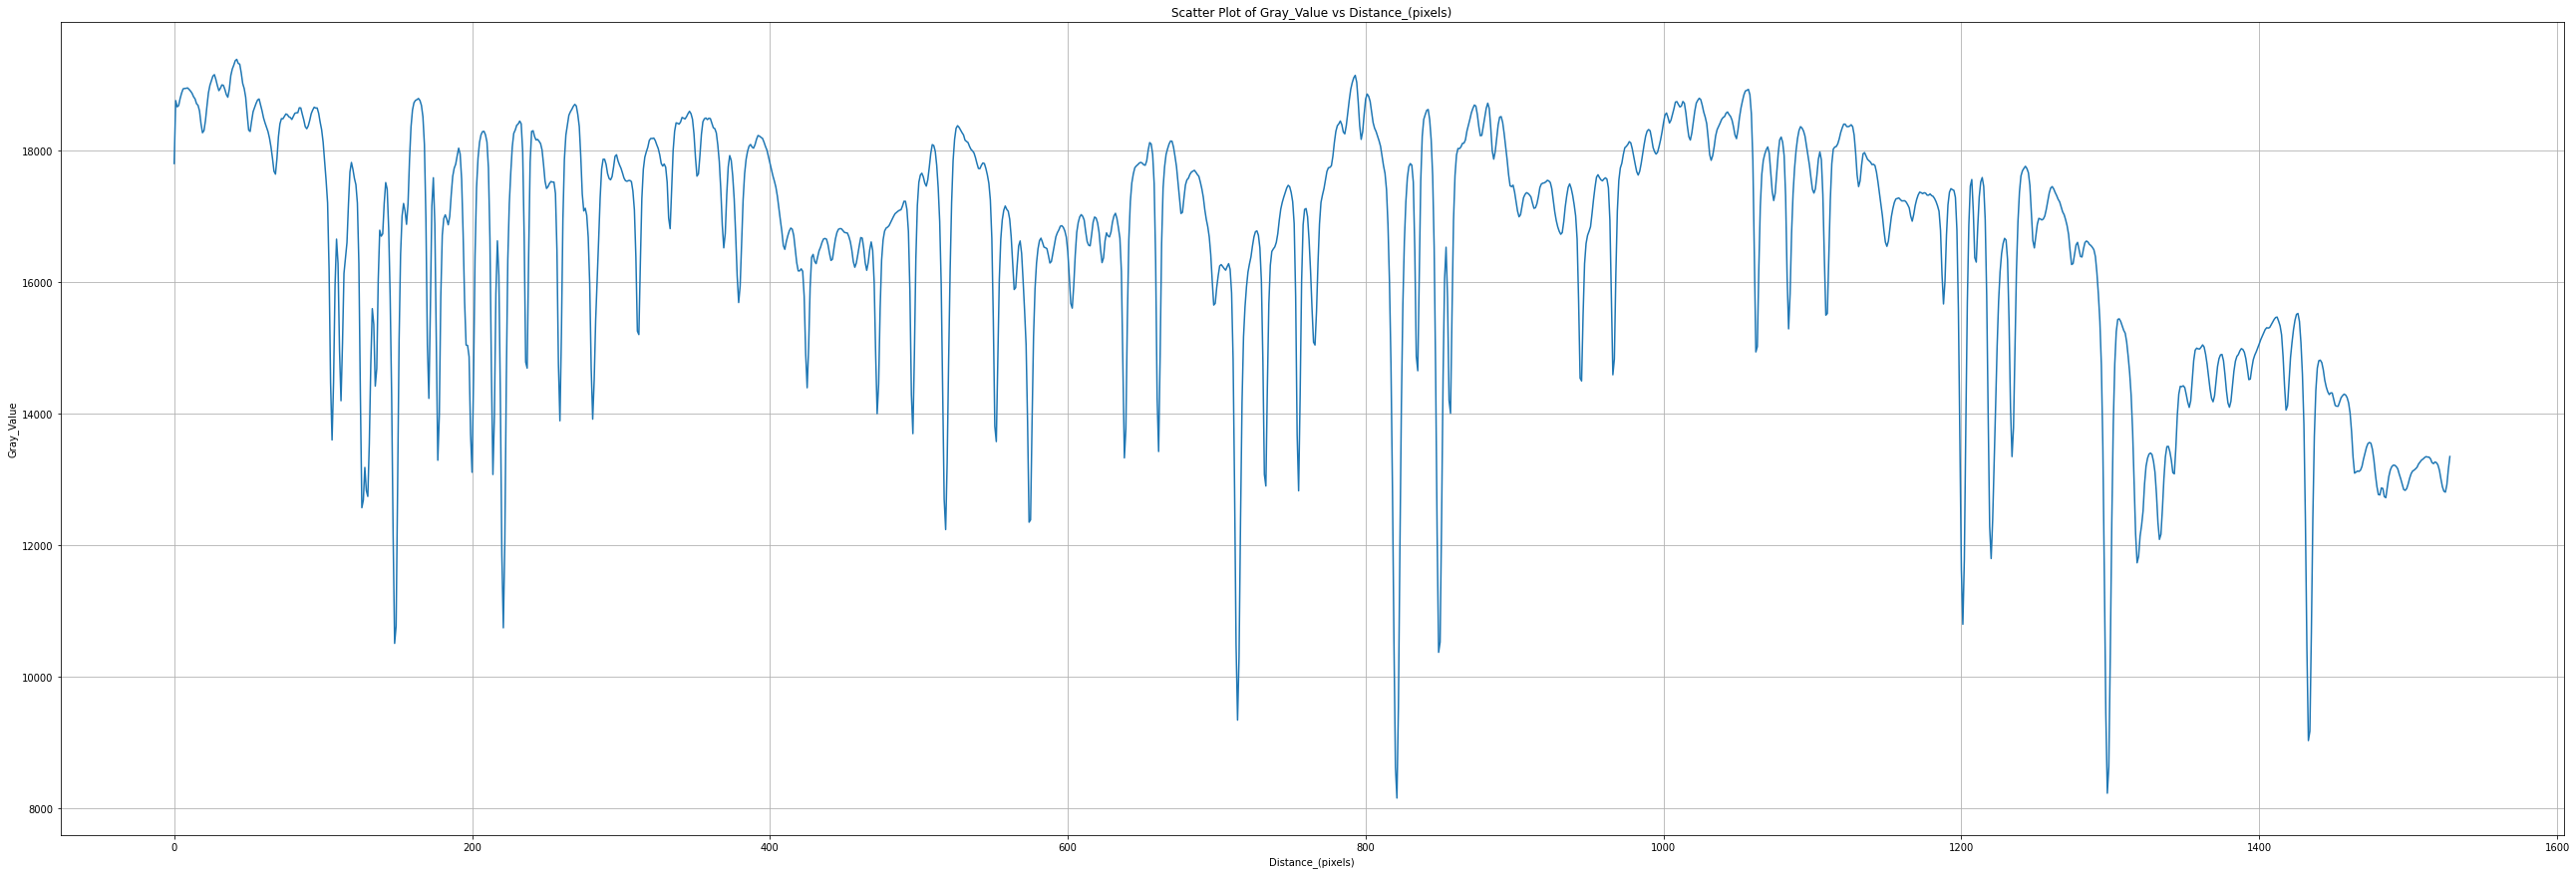

In [100]:
fig,ax = plt.subplots(ncols=1,figsize=(45,15),sharey=True)

plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()

In [101]:
len(x_values)

1529

Confirmar Escala

In [102]:
D="Gray_Value"
df.head()

,Distance_(pixels),Gray_Value
0,0,17803.834
1,1,18761.166
2,2,18666.000
3,3,18686.000
4,4,18793.834


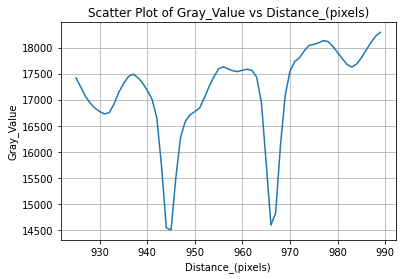

,Distance_(pixels),Gray_Value
945,945.0,14496.167
966,966.0,14590.000


In [103]:
plt.plot(x_values[925:990], y_values[925:990])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()
dfb=df.iloc[925:990]
local_minima = []
for i in range(926, 988):
    if dfb[D][i] < dfb[D][i - 1] and dfb[D][i] < dfb[D][i + 1]:
        if dfb[D][i] <16000:
            local_minima.append(dfb.iloc[i-925])

# Convert the list of local minima to a DataFrame
df3 = pd.DataFrame(local_minima)
df3

In [104]:
PIXELES=[]

# Ajuste Pixeles

In [105]:
def RESIDUALES(tipo,X,y,params):
    if tipo==1:
        residuals =  y - generate_parabola(X,*params)
        ss_residual = np.sum(residuals**2)
        ss_total = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_residual / ss_total)
        print(r2)
        centro=params[0]
        print(centro)
        horizontal=np.linspace(X[0],X[-1],100)
        plt.plot(horizontal,generate_parabola(horizontal,*params))
    else:
        residuals =  y - generate_parabola1(X,*params)
        ss_residual = np.sum(residuals**2)
        ss_total = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_residual / ss_total)
        print(r2)
        centro=params[0]
        print(centro)
        horizontal=np.linspace(X[0],X[-1],100)
        plt.plot(horizontal,generate_parabola1(horizontal,*params))

0.999567747112652
236.56679539550208
0.9995667614351106
236.56688724487262


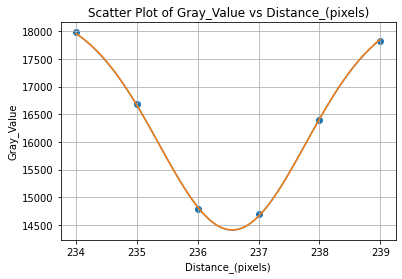

In [106]:
lineas=[]
plt.scatter(x_values[234:240], y_values[234:240])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[234:240]
y=list(y_values)
y=y[234:240]
params, covariance = curve_fit(generate_parabola, X, y,p0=[236.5,18000,3000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[236,14000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9954546848272257
258.84669016502147
0.9987391127035518
258.8554596712499


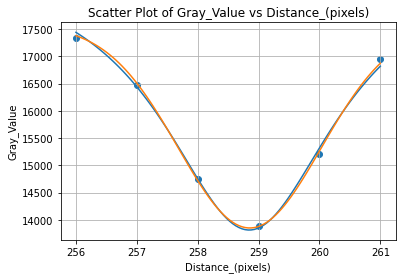

In [107]:
lineas=[]
plt.scatter(x_values[256:262], y_values[256:262])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[256:262]
y=list(y_values)
y=y[256:262]
params, covariance = curve_fit(generate_parabola, X, y,p0=[259,17500,3000,5,1])
centro=params[0]
RESIDUALES(1,X,y,params)
lineas.append(centro)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[259,14000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9785494688342092
281.23269218843444
0.9779125093078523
281.2329971990109


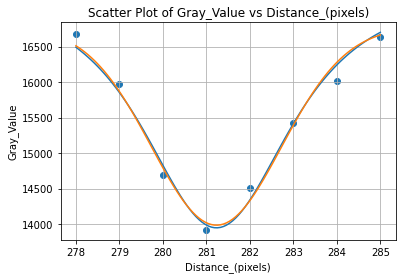

In [108]:
lineas=[]
plt.scatter(x_values[278:286], y_values[278:286])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[278:286]
y=list(y_values)
y=y[278:286]
params, covariance = curve_fit(generate_parabola, X, y,p0=[281,16500,2500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[281,14000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9985828194949425
944.5768811500031
0.9980993936549137
944.5818786500771


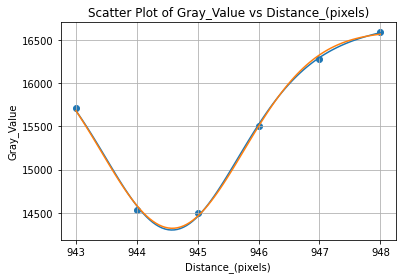

In [109]:
lineas=[]
plt.scatter(x_values[943:949], y_values[943:949])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[943:949]
y=list(y_values)
y=y[943:949]
params, covariance = curve_fit(generate_parabola, X, y,p0=[945,17000,2500,0.1,0.3])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[944.5,14500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9997663929434196
966.3742623796586
0.9993344380795659
966.3750612617271


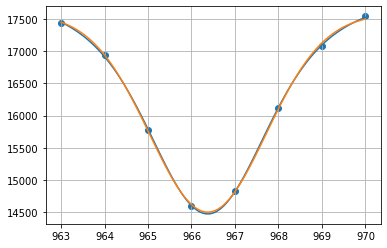

In [110]:
lineas=[]
plt.scatter(x_values[963:971], y_values[963:971])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[963:971]
y=list(y_values)
y=y[963:971]
params, covariance = curve_fit(generate_parabola, X, y,p0=[966.5,17000,2500,3,3])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[966.5,14500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

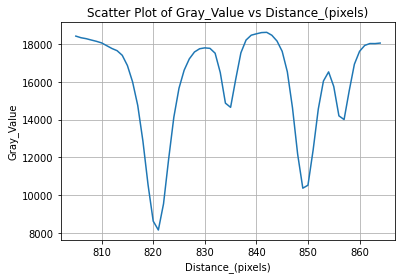

In [111]:
plt.plot(x_values[805:865], y_values[805:865])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()


C:\Users\juang\AppData\Local\Temp/ipykernel_17232/3766084665.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,3000,10,10])


1.0
834.6037887922462
0.999996073334835
834.6031802858104


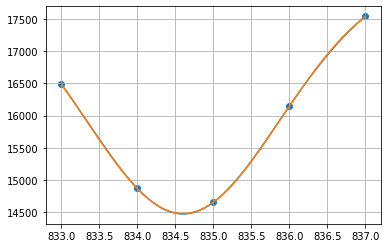

In [112]:
lineas=[]
plt.scatter(x_values[833:838], y_values[833:838])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[833:838]
y=list(y_values)
y=y[833:838]
params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[834.5,14500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

C:\Users\juang\AppData\Local\Temp/ipykernel_17232/2435141029.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[857,17000,3000,10,10])


0.9962301614231132
856.5840634192017
0.9999925104868493
856.5797783047869


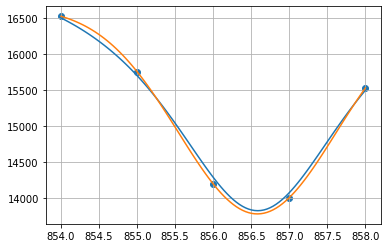

In [113]:
lineas=[]
plt.scatter(x_values[854:859], y_values[854:859])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[854:859]
y=list(y_values)
y=y[854:859]
params, covariance = curve_fit(generate_parabola, X, y,p0=[857,17000,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[856.5,14000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

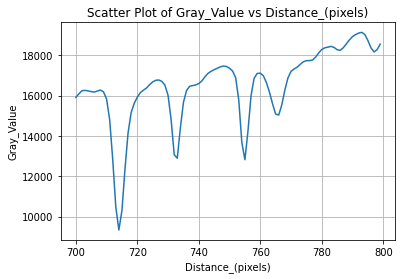

In [114]:
plt.plot(x_values[700:800], y_values[700:800])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9981623499182154
732.6247262378813
0.9978217993045418
732.6255460087756


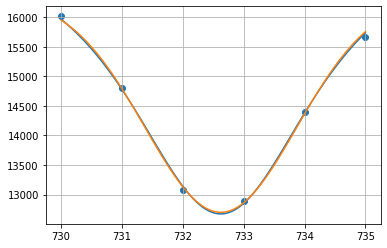

In [115]:
lineas=[]
plt.scatter(x_values[730:736], y_values[730:736])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[730:736]
y=list(y_values)
y=y[730:736]
params, covariance = curve_fit(generate_parabola, X, y,p0=[733,15500,2500,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[732.5,13000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.998446185704957
754.8845496146274
0.9984226493559822
754.8847613093682


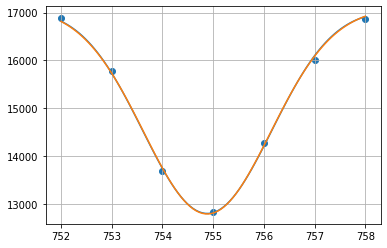

In [116]:
lineas=[]
plt.scatter(x_values[752:759], y_values[752:759])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[752:759]
y=list(y_values)
y=y[752:759]
params, covariance = curve_fit(generate_parabola, X, y,p0=[755,16000,5000,5,5])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[755,13000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

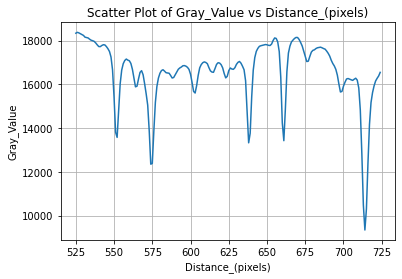

In [117]:
plt.plot(x_values[525:725], y_values[525:725])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9937353424999674
551.7058583997785
0.9936704901579715
551.7066399876423


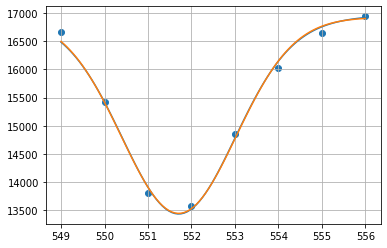

In [118]:
lineas=[]
plt.scatter(x_values[549:557], y_values[549:557])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[549:557]
y=list(y_values)
y=y[549:557]
params, covariance = curve_fit(generate_parabola, X, y,p0=[551.5,16500,3000,0.5,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[551.5,13500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9993919435719016
574.4867021414926
0.9998770219176436
574.4974115212407


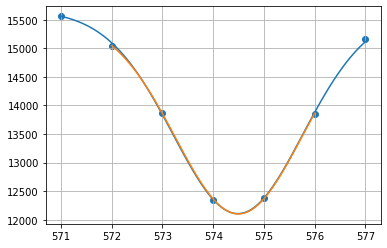

In [119]:
lineas=[]
plt.scatter(x_values[571:578], y_values[571:578])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[571:578]
y=list(y_values)
y=y[571:578]
params, covariance = curve_fit(generate_parabola, X, y,p0=[574.5,15000,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
X= list(df["Distance_(pixels)"])
X=X[572:577]
y=list(y_values)
y=y[572:577]
params, covariance = curve_fit(generate_parabola1, X, y,p0=[574.5,12500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9996864241575927
638.2894950596391
0.9999993396638158
638.2971571465868


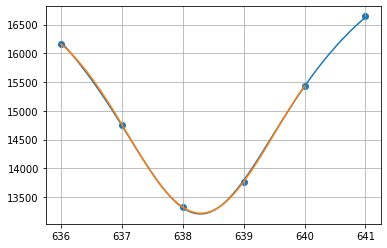

In [120]:
lineas=[]
plt.scatter(x_values[636:642], y_values[636:642])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[636:642]
y=list(y_values)
y=y[636:642]
params, covariance = curve_fit(generate_parabola, X, y,p0=[638,16000,2500,0.5,2])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
X= list(df["Distance_(pixels)"])
X=X[636:641]
y=list(y_values)
y=y[636:641]
params, covariance = curve_fit(generate_parabola1, X, y,p0=[638,13500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9984162256699115
660.8704301892491
0.9980933533435777
660.8727464475868


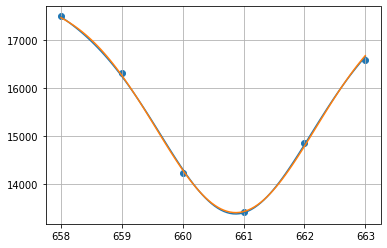

In [121]:
lineas=[]
plt.scatter(x_values[658:664], y_values[658:664])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[658:664]
y=list(y_values)
y=y[658:664]
params, covariance = curve_fit(generate_parabola, X, y,p0=[661,17500,4000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[661,13500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

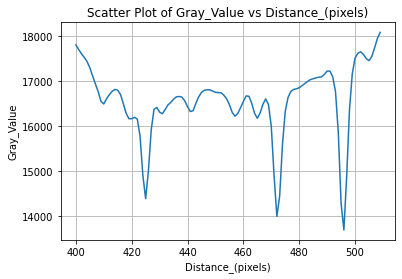

In [122]:
plt.plot(x_values[400:510], y_values[400:510])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9947149548985935
424.91539091224814
0.9943512894859002
424.9186442830814


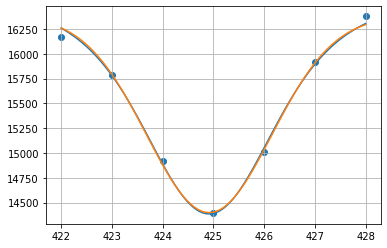

In [123]:
lineas=[]
plt.scatter(x_values[422:429], y_values[422:429])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[422:429]
y=list(y_values)
y=y[422:429]
params, covariance = curve_fit(generate_parabola, X, y,p0=[425,17000,2000,5,5])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[425,14400,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9998553933034622
472.2045530780797
0.9994964797999578
472.2055691025656


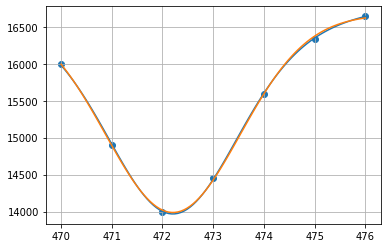

In [124]:
lineas=[]
plt.scatter(x_values[470:477], y_values[470:477])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[470:477]
y=list(y_values)
y=y[470:477]
params, covariance = curve_fit(generate_parabola, X, y,p0=[472,16000,2000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[472,14000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9999997085057211
495.80609827168723
0.9998288979827752
495.8072185919731


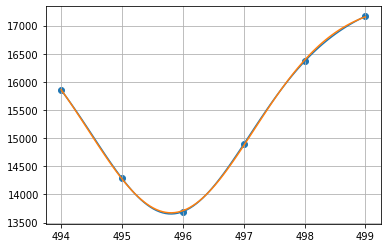

In [125]:
lineas=[]
plt.scatter(x_values[494:500], y_values[494:500])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[494:500]
y=list(y_values)
y=y[494:500]
params, covariance = curve_fit(generate_parabola, X, y,p0=[496,16500,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[496,13500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9858917988310085
1084.240832273254
0.9839674174174727
1084.2520232834217


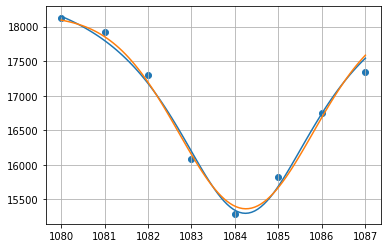

In [126]:
lineas=[]
plt.scatter(x_values[1080:1088], y_values[1080:1088])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1080:1088]
y=list(y_values)
y=y[1080:1088]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1084,18000,3500,5,5])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1084,15500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9994382072064655
1188.0710510440579
0.9989131353771339
1188.0683005074115


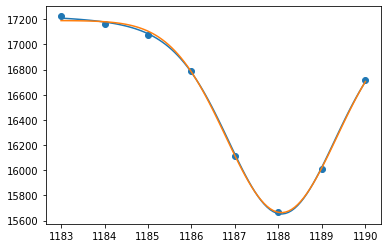

In [127]:
lineas=[]
plt.scatter(x_values[1183:1191], y_values[1183:1191])
X= list(df["Distance_(pixels)"])
X=X[1183:1191]
y=list(y_values)
y=y[1183:1191]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1188,17200,1500,5,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1188,15600,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

0.9954862814462891
1209.6566596747052
0.9946808460685658
1209.6631385087069


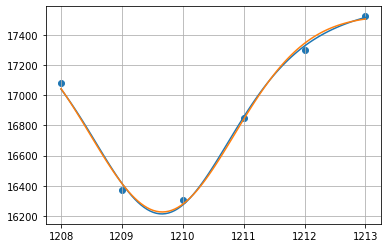

In [128]:
lineas=[]
plt.scatter(x_values[1208:1214], y_values[1208:1214])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1208:1214]
y=list(y_values)
y=y[1208:1214]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1210,17600,1500,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1210,16400,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
PIXELES.append(ubicacion)

In [129]:
PIXELES.sort()
PIXELES

[236.56684132018734,
 258.8510749181357,
 281.23284469372265,
 424.91701759766477,
 472.20506109032266,
 495.80665843183016,
 551.7062491937104,
 574.4920568313667,
 638.2933261031129,
 660.8715883184179,
 732.6251361233285,
 754.8846554619978,
 834.6034845390283,
 856.5819208619944,
 944.5793799000401,
 966.3746618206928,
 1084.2464277783379,
 1188.0696757757346,
 1209.659899091706]

In [130]:
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Pix = [238, 260.5, 282.5, 426.6, 473.7, 497, 553, 576, 640, 662, 734, 756, 836, 858, 946, 968, 1085, 1190, 1211]
dif=[]
for i in range(len(PIXELES)):
    d=PIXELES[i]-Pix[i]
    dif.append(d)
Comparacion=  pd.DataFrame({
    'Posición Angstrom': moore,
    'Pixeles Estimados': Pix,
    'Pixeles Calculados': PIXELES,
    "Diferencia": dif
})

In [131]:
Comparacion

,Posición Angstrom,Pixeles Estimados,Pixeles Calculados,Diferencia
0,6281.178,238.0,236.566841,-1.433159
1,6281.956,260.5,258.851075,-1.648925
2,6282.726,282.5,281.232845,-1.267155
3,6287.749,426.6,424.917018,-1.682982
4,6289.398,473.7,472.205061,-1.494939
5,6290.221,497.0,495.806658,-1.193342
6,6292.162,553.0,551.706249,-1.293751
7,6292.958,576.0,574.492057,-1.507943
8,6295.178,640.0,638.293326,-1.706674
9,6295.960,662.0,660.871588,-1.128412


# Escala Pixeles -Angstrom

In [132]:
print(PIXELES)

[236.56684132018734, 258.8510749181357, 281.23284469372265, 424.91701759766477, 472.20506109032266, 495.80665843183016, 551.7062491937104, 574.4920568313667, 638.2933261031129, 660.8715883184179, 732.6251361233285, 754.8846554619978, 834.6034845390283, 856.5819208619944, 944.5793799000401, 966.3746618206928, 1084.2464277783379, 1188.0696757757346, 1209.659899091706]


0.9999998781043015


C:\Users\juang\AppData\Local\Temp/ipykernel_17232/2300956569.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params_escala, covariance = curve_fit(escala, x,moore)


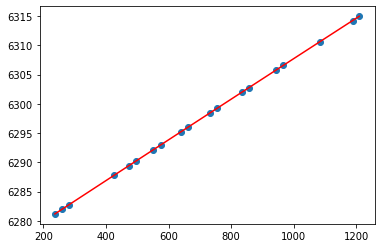

In [133]:
def escala(x, A,a,B,b,C,c,D):
    return (A*(x))+(B*((x)**2))+D#+(C*((x+c)**3))
x=PIXELES
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Rowland1=[6287.285,6289.140,6290.221,6292.162,6292.958,6294.650,6295.96,6298.457,6299.228,6302,6302.764,6305.314,6306.565,6310.636]
Rowland2=[6287.945,6289.95,6290.221,6292.614,6292.958,6295.650,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636]
params_escala, covariance = curve_fit(escala, x,moore)
plt.scatter(x, moore)
y=[]
for i in range(len(x)):
    Y=escala(x[i],*params_escala)
    y.append(Y)
plt.plot(x, y,"r")
moore=np.array(moore)
y= np.array(y)
residuals =  moore - y
ss_residual = np.sum(residuals**2)
ss_total = np.sum((moore - np.mean(moore))**2)
r2 = 1 - (ss_residual / ss_total)
print(r2)

In [134]:
#APLICACION ESCALA
print(escala(810,*params_escala))

6301.14287493804


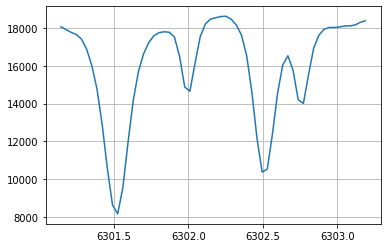

In [135]:
#APLICACION ESCALA
armstrong=[]
for i in range(1529):
    armstrong.append(escala(i,*params_escala))

plt.plot(armstrong[810:870], y_values[810:870])

plt.grid(True)

# Show the plot
plt.show()

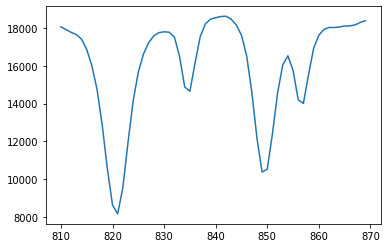

In [136]:
plt.plot(x_values[810:870], y_values[810:870])

# Prueba Ajuste

In [137]:
df["Armstrong"] = armstrong

In [138]:
posiciones=[armstrong,x_values]

In [139]:
Centros=[]

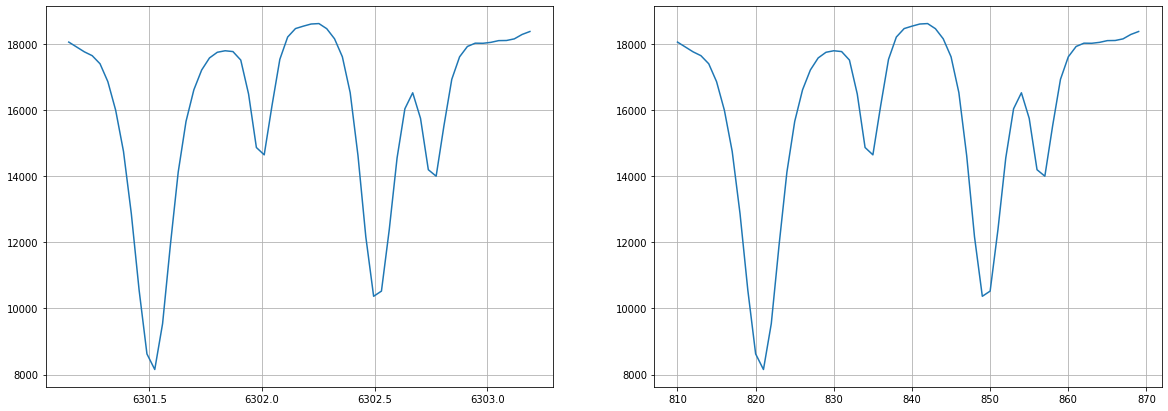

In [140]:
fig,ax = plt.subplots(ncols=2,figsize=(20,7))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot


# Ajuste Curvas Angstrom

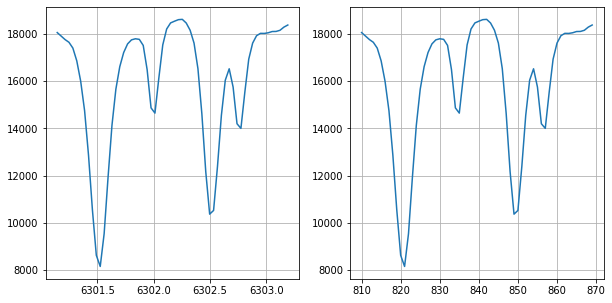

In [141]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

0.9998003858649243
820.7089828437698
0.9996506074017316
820.7072352912166


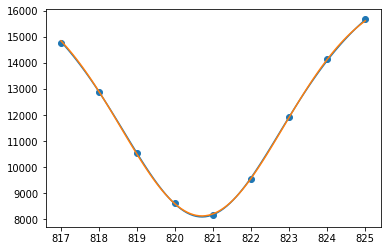

In [142]:
lineas=[]
plt.scatter(x_values[817:826], y_values[817:826])
X= list(df["Distance_(pixels)"])
X=X[817:826]
y=list(y_values)
y=y[817:826]
params, covariance = curve_fit(generate_parabola, X, y,p0=[821,15000,7000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[821,8000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.996040926965867
849.504158566992


0.9960180984027396
849.5027189744213


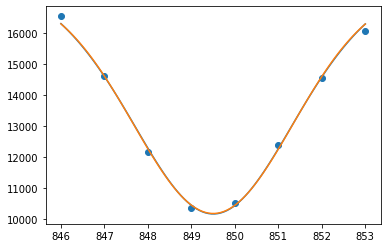

In [143]:
lineas=[]
plt.scatter(x_values[846:854], y_values[846:854])
X= list(df["Distance_(pixels)"])
X=X[846:854]
y=list(y_values)
y=y[846:854]
params, covariance = curve_fit(generate_parabola, X, y,p0=[849.5,16000,6000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[849.5,10000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

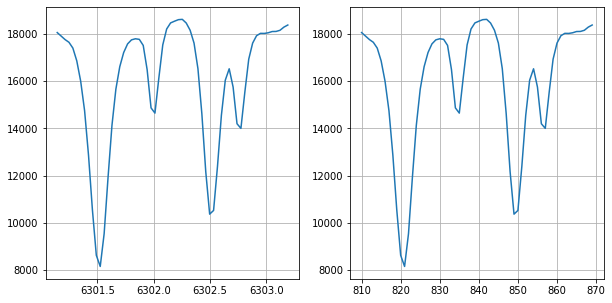

In [144]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

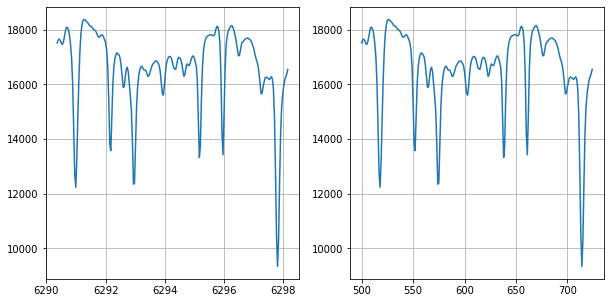

In [145]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][500:725], y_values[500:725])
    plt.grid(True)
# Show the plot

0.9974692367557401
517.8419301510922
0.9962147692933786
517.8485776255116


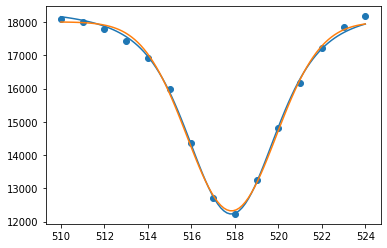

In [146]:
lineas=[]
plt.scatter(x_values[510:525], y_values[510:525])
X= list(df["Distance_(pixels)"])
X=X[510:525]
y=list(y_values)
y=y[510:525]
params, covariance = curve_fit(generate_parabola, X, y,p0=[518,18000,6000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[518,12000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9979003179482928
714.1085645592836
0.9975874696029148
714.1109046228793


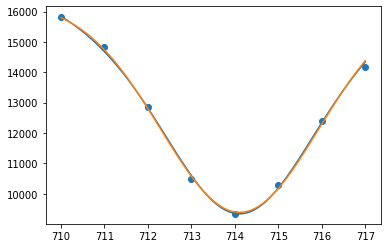

In [147]:
lineas=[]
plt.scatter(x_values[710:718], y_values[710:718])
X= list(df["Distance_(pixels)"])
X=X[710:718]
y=list(y_values)
y=y[710:718]
params, covariance = curve_fit(generate_parabola, X, y,p0=[714,16000,6000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[714,9500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

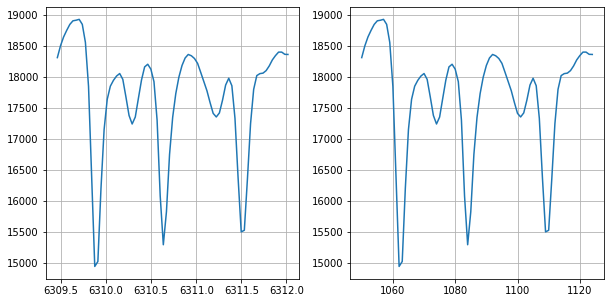

In [148]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1050:1125], y_values[1050:1125])
    plt.grid(True)
# Show the plot

0.9951859426199285
1062.5391025518666
0.9944071453137266
1062.5556202929547


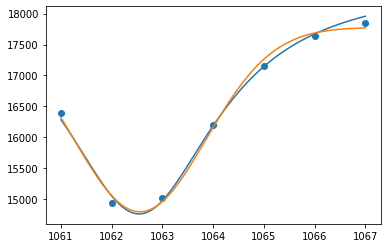

In [149]:
lineas=[]
plt.scatter(x_values[1061:1068], y_values[1061:1068])
X= list(df["Distance_(pixels)"])
X=X[1061:1068]
y=list(y_values)
y=y[1061:1068]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1062,18000,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1063,15000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9994168975371064
1109.5181306402494
0.9993379861930214
1109.5190904518147


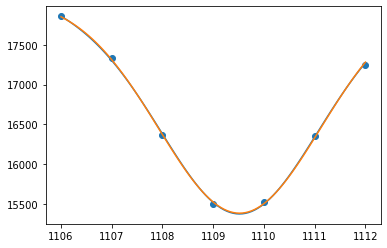

In [150]:
lineas=[]
plt.scatter(x_values[1106:1113], y_values[1106:1113])
X= list(df["Distance_(pixels)"])
X=X[1106:1113]
y=list(y_values)
y=y[1106:1113]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1109,18000,2500,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1109,15500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

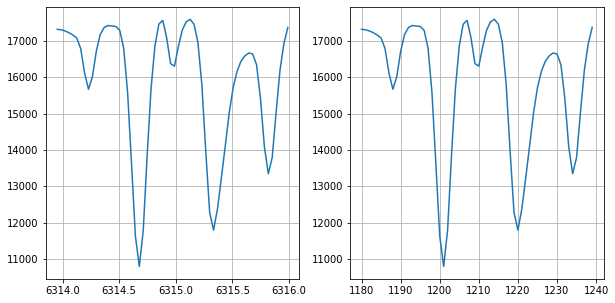

In [151]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1180:1240], y_values[1180:1240])
    plt.grid(True)
# Show the plot

0.968867874385809
1200.9532317842934
0.9999668131874169
1200.956813706842


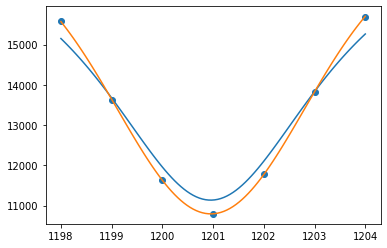

In [152]:
lineas=[]
plt.scatter(x_values[1198:1205], y_values[1198:1205])
X= list(df["Distance_(pixels)"])
X=X[1198:1205]
y=list(y_values)
y=y[1198:1205]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1201,18000,7400,10,1.3])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1201,11000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9988568518762201
1219.960949987665
0.9908124808618531
1220.1550863023335


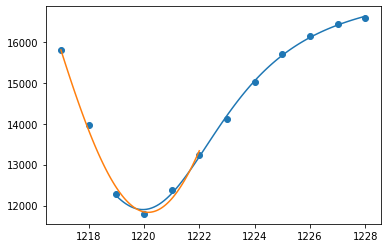

In [153]:
lineas=[]
plt.scatter(x_values[1217:1229], y_values[1217:1229])
X= list(df["Distance_(pixels)"])
X=X[1219:1229]
y=list(y_values)
y=y[1219:1229]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1220,16500,4500,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
X= list(df["Distance_(pixels)"])
X=X[1217:1223]
y=list(y_values)
y=y[1217:1223]
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1220.5,12000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9958997360858691
1234.1361603597309
0.9952339364356397
1234.1256875987203


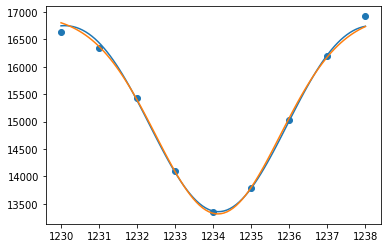

In [154]:
lineas=[]
plt.scatter(x_values[1230:1239], y_values[1230:1239])
X= list(df["Distance_(pixels)"])
X=X[1230:1239]
y=list(y_values)
y=y[1230:1239]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1234,16500,3000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1234,13500,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

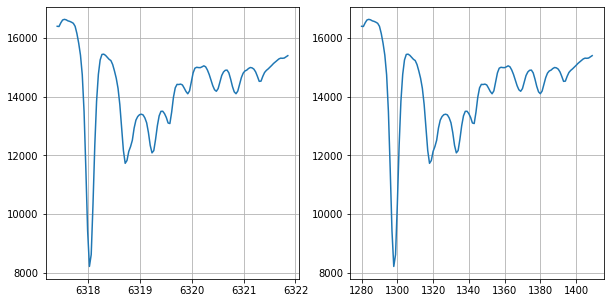

In [155]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1280:1410], y_values[1280:1410])
    plt.grid(True)
# Show the plot

0.9990965348516591
1298.3042952250378
0.9988807159842658
1298.3057655566752


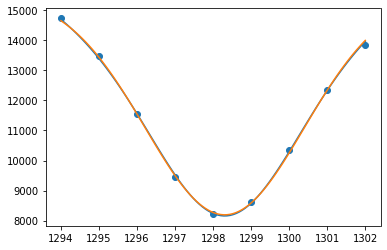

In [156]:
lineas=[]
plt.scatter(x_values[1294:1303], y_values[1294:1303])
X= list(df["Distance_(pixels)"])
X=X[1294:1303]
y=list(y_values)
y=y[1294:1303]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1298,15000,7000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1298,8000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.982392405284792
1318.6428418169767
0.9940606253347904
1318.5101599236966


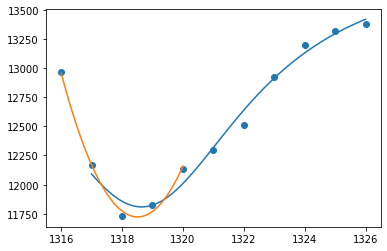

In [157]:
lineas=[]
plt.scatter(x_values[1316:1327], y_values[1316:1327])
X= list(df["Distance_(pixels)"])
X=X[1317:1327]
y=list(y_values)
y=y[1317:1327]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1318,13300,2000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
X= list(df["Distance_(pixels)"])
X=X[1316:1321]
y=list(y_values)
y=y[1316:1321]
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1318.5,11700,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9895530217881926
1333.263063465515
0.9985848528400261
1333.2335044536812


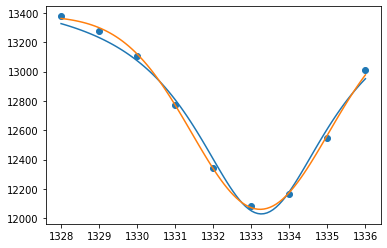

In [158]:
lineas=[]
plt.scatter(x_values[1328:1337], y_values[1328:1337])
X= list(df["Distance_(pixels)"])
X=X[1328:1337]
y=list(y_values)
y=y[1328:1337]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1333,13300,1300,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1333,12100,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

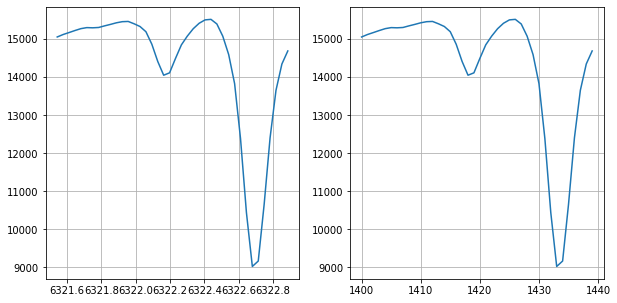

In [159]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1400:1440], y_values[1400:1440])
    plt.grid(True)
# Show the plot

0.9970908405657225
1418.442524145423
0.9944271202530686
1418.4533576832207


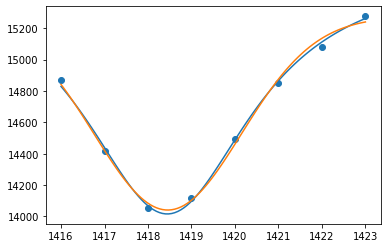

In [160]:
lineas=[]
plt.scatter(x_values[1416:1424], y_values[1416:1424])
X= list(df["Distance_(pixels)"])
X=X[1416:1424]
y=list(y_values)
y=y[1416:1424]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1419,15200,1200,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1419,14100,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

0.9995189160460068
1433.4600288130289
0.9993413591010485
1433.4631205021099


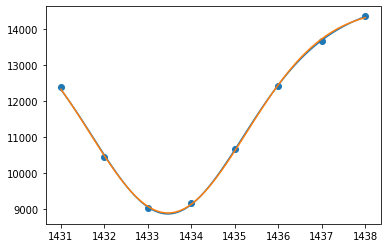

In [161]:
lineas=[]
plt.scatter(x_values[1431:1439], y_values[1431:1439])
X= list(df["Distance_(pixels)"])
X=X[1431:1439]
y=list(y_values)
y=y[1431:1439]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1433,14000,5000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[1433,9000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

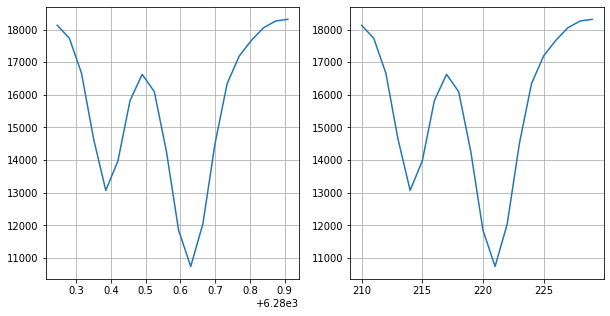

In [162]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][210:230], y_values[210:230])
    plt.grid(True)
# Show the plot

0.9997836688676214
220.94522610384809
0.9997669112473853
220.94527189938157


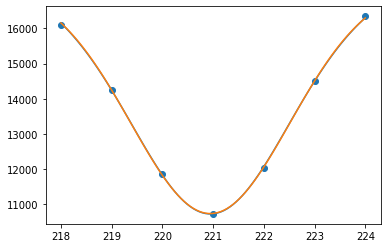

In [163]:
lineas=[]
plt.scatter(x_values[218:225], y_values[218:225])
X= list(df["Distance_(pixels)"])
X=X[218:225]
y=list(y_values)
y=y[218:225]
params, covariance = curve_fit(generate_parabola, X, y,p0=[221,16000,5000,10,10])
centro=params[0]
lineas.append(centro)
RESIDUALES(1,X,y,params)
params, covariance = curve_fit(generate_parabola1, X, y,p0=[221,11000,1,1])
centro=params[0]
lineas.append(centro)
RESIDUALES(2,X,y,params)
ubicacion=sum(lineas)/len(lineas)
Centros.append(ubicacion)

# Calculo Velocidades

In [164]:
Lineas_abs_angstrom=[]
for i in range(len(Centros)):
    a=escala(Centros[i],*params_escala)
    Lineas_abs_angstrom.append(a)

In [165]:
Lineas_abs_angstrom.sort()
print(Lineas_abs_angstrom)


[6280.627956511798, 6290.986546128874, 6297.813405015058, 6301.514434901063, 6302.513359529872, 6309.892973347642, 6311.517402504403, 6314.676892606564, 6315.336526391354, 6315.822369675304, 6318.036801292695, 6318.735936173801, 6319.2418362696035, 6322.1778045295305, 6322.694851369158]


In [166]:
# Separación de otro elementos del Hierro
indices_to_remove = [6-1, 8-1, 13-1, 14-1,12-1]
Hierros = [Lineas_abs_angstrom[i] for i in range(len(Lineas_abs_angstrom)) if i not in indices_to_remove]
print(Hierros)

[6280.627956511798, 6290.986546128874, 6297.813405015058, 6301.514434901063, 6302.513359529872, 6311.517402504403, 6315.336526391354, 6315.822369675304, 6318.036801292695, 6322.694851369158]


In [167]:
#Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.3063,6315.8110,6318.0171,6322.6851]
#Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.3056,6315.8107,6318.0176,6322.6847]

#La linea 6315.348947813029 resulta en una velocidad atipica respecto al resto de velocidades, se presenta la opción de realizar los calculos estadisticos ignorando este valor atipico con fines comparativos: 

Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.8110,6318.0171,6322.6851]
Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.8107,6318.0176,6322.6847]
Hierros.pop(6)

6315.336526391354

Datos tomados del: NIST Atomic Spectra Database Lines Data

In [168]:
from scipy.constants import c
def vel_tan(real, doppler):
    #v= ((real/doppler)-1)*c
    v=((doppler-real)/real)*c
    return v
def tiempo(vt):
    vt_km= vt/1000 #metros a kilometros
    ra_sol= 1391016/2
    tiempo_s= (2*np.pi*ra_sol)/np.abs(vt_km)
    tiempo_d= tiempo_s/ (60*60*24)   #segundos a dias
    return tiempo_d


In [169]:
velocidades_Air=[]
velocidades_Ritz=[]

In [170]:
#Fe1
for i in range(len(Hierros)):
    vt1=vel_tan(Reales_Air_Hierro[i], Hierros[i])
    vt2=vel_tan(Reales_Ritz_Hierro[i], Hierros[i])
    velocidades_Air.append(vt1)
    velocidades_Ritz.append(vt2)
    print(vt1)
    print(vt2)
    print("--------------------")


484.8003387106989
537.306685293207
--------------------
988.6451725804608
1036.299778231131
--------------------
985.616334638647
1004.6575115628896
--------------------
648.6772967548446
705.7671564324443
--------------------
958.9339997251093
958.9339997251093
--------------------
831.3584566993798
869.3580868390025
--------------------
539.6841207101523
553.9242402271124
--------------------
934.8342793675524
911.1090057235414
--------------------
462.36478371410004
481.3309624507706
--------------------


Calculo Estadistico para Lineas de Hierro

In [171]:
promedio_hierro_air=sum(velocidades_Air)/len(velocidades_Air)
promedio_hierro_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
std_hierro_air=np.std(velocidades_Air)
std_hierro_ritz=np.std(velocidades_Ritz)
print("Promedio Air: "+str(promedio_hierro_air)+" .Desviación Estandar: "+str(std_hierro_air))
print("Promedio Ritz: "+str(promedio_hierro_Ritz)+" .Desviación Estandar: "+str(std_hierro_ritz))
print("Promedio General: "+str((promedio_hierro_Ritz+promedio_hierro_air)/2))

Promedio Air: 759.4349758778828 .Desviación Estandar: 211.78229635203905
Promedio Ritz: 784.2986029428009 .Desviación Estandar: 204.91464089429826
Promedio General: 771.8667894103419


(array([3., 0., 1., 2., 3.]),
 array([ 481.33096245,  592.32472561,  703.31848876,  814.31225192,
         925.30601508, 1036.29977823]),
 <BarContainer object of 5 artists>)

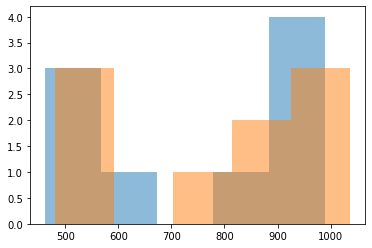

In [172]:
plt.hist(velocidades_Air,bins=5,alpha=0.5)
plt.hist(velocidades_Ritz,bins=5,alpha=0.5)

Calculo Estadistico para lineas de otros elementos

In [173]:
#Sc
Real_Air=6309.88
Doppler=Lineas_abs_angstrom[5]
vt1=vel_tan(Real_Air, Doppler)
velocidades_Air.append(vt1)
print(vt1)

616.3844285360691


In [174]:
#Ni
Real_Air=6314.66
Real_Ritz=6314.659
Doppler=Lineas_abs_angstrom[7]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

801.9871289931044
849.4628929335177


In [175]:
#Mg
Real_Air=6319.236
Real_Ritz=6319.237
Doppler=Lineas_abs_angstrom[12]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

276.87992820898177
229.43864139840574


In [176]:
#Ni
Real_Ritz=6322.166 	
Doppler=Lineas_abs_angstrom[13]
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Ritz.append(vt2)
print(vt2)

559.7621010623487


In [177]:
len(velocidades_Air)

12

In [178]:
promedio_otros_air=sum(velocidades_Air[10:])/len(velocidades_Air[10:])
promedio_otros_Ritz=sum(velocidades_Ritz[10:])/len(velocidades_Ritz[10:])
std_otros_air=np.std(velocidades_Air[10:])
std_otros_ritz=np.std(velocidades_Ritz[10:])
print("Promedio Air: "+str(promedio_otros_air)+" .Desviación Estandar: "+str(std_otros_air))
print("Promedio Ritz: "+str(promedio_otros_Ritz)+" .Desviación Estandar: "+str(std_otros_ritz))
print("Promedio General: "+str((promedio_otros_Ritz+promedio_otros_air)/2))

Promedio Air: 539.4335286010431 .Desviación Estandar: 262.55360039206136
Promedio Ritz: 394.6003712303772 .Desviación Estandar: 165.16172983197148
Promedio General: 467.01694991571014


# Calculos Estadisticos Generales

In [179]:
#Promedio
promedio_Air=sum(velocidades_Air)/len(velocidades_Air)
promedio_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
print(promedio_Air)
print(promedio_Ritz)

710.8471890532584
724.7792551566234


In [180]:
promedio_ge=(sum(velocidades_Air)+sum(velocidades_Ritz))/(len(velocidades_Ritz)+len(velocidades_Air))
promedio_ge

717.8132221049409

In [181]:
#Desviación Estandar
std_air=np.std(velocidades_Air)
std_ritz=np.std(velocidades_Ritz)
print(std_air)
print(std_ritz)

229.2142214813058
241.16592829360619


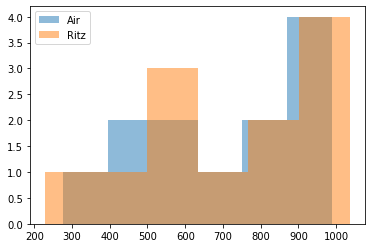

In [182]:
plt.hist(velocidades_Air,bins=6,label="Air",alpha=0.5)
plt.hist(velocidades_Ritz,bins=6,label="Ritz",alpha=0.5)
plt.legend()